In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
%matplotlib inline

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/vivianesilviana/vivianesilviana/main/data_iklim.csv", sep=";")
df.head(5)

,kelembapan,lama_penyinaran,kecepatan_angin,temperatur
0,80,6.8,1,27.0
1,80,6.3,2,26.5
2,76,8.4,2,26.8
3,78,6.8,1,26.4
4,76,9.6,2,25.8


In [ ]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('temperatur',axis='columns'))
scaled_y = sy.fit_transform(df['temperatur'].values.reshape(df.shape[0],1))

scaled_X

array([[0.6       , 0.64761905, 0.        ],
       [0.6       , 0.6       , 0.5       ],
       [0.33333333, 0.8       , 0.5       ],
       [0.46666667, 0.64761905, 0.        ],
       [0.33333333, 0.91428571, 0.5       ],
       [0.06666667, 0.94285714, 0.5       ],
       [0.2       , 0.94285714, 0.5       ],
       [0.66666667, 0.83809524, 0.5       ],
       [0.6       , 0.73333333, 0.        ],
       [0.93333333, 0.42857143, 0.5       ],
       [0.        , 0.6       , 1.        ],
       [0.06666667, 0.88571429, 0.5       ],
       [0.8       , 0.8952381 , 0.5       ],
       [0.73333333, 0.61904762, 0.5       ],
       [0.53333333, 0.36190476, 0.5       ],
       [0.06666667, 0.9047619 , 0.5       ],
       [0.06666667, 0.53333333, 0.5       ],
       [0.6       , 0.60952381, 0.5       ],
       [0.66666667, 0.8952381 , 0.5       ],
       [0.6       , 0.66666667, 0.        ],
       [0.66666667, 0.84761905, 0.5       ],
       [0.53333333, 0.72380952, 0.5       ],
       [0.

In [ ]:
scaled_y

array([[0.75609756],
       [0.63414634],
       [0.70731707],
       [0.6097561 ],
       [0.46341463],
       [0.29268293],
       [0.14634146],
       [0.31707317],
       [0.26829268],
       [0.73170732],
       [0.92682927],
       [0.63414634],
       [0.46341463],
       [0.3902439 ],
       [0.51219512],
       [0.2195122 ],
       [0.36585366],
       [0.53658537],
       [0.51219512],
       [0.70731707],
       [0.63414634],
       [0.53658537],
       [0.63414634],
       [0.70731707],
       [0.3902439 ],
       [0.14634146],
       [0.41463415],
       [0.51219512],
       [0.26829268],
       [0.63414634],
       [0.46341463],
       [0.3902439 ],
       [0.51219512],
       [0.        ],
       [0.58536585],
       [0.85365854],
       [0.65853659],
       [0.70731707],
       [0.6097561 ],
       [0.70731707],
       [0.53658537],
       [0.75609756],
       [0.2195122 ],
       [0.48780488],
       [0.58536585],
       [0.26829268],
       [0.68292683],
       [0.487

In [ ]:
scaled_y_reshape=scaled_y.reshape(scaled_y.shape[0],)
scaled_y_reshape

array([0.75609756, 0.63414634, 0.70731707, 0.6097561 , 0.46341463,
       0.29268293, 0.14634146, 0.31707317, 0.26829268, 0.73170732,
       0.92682927, 0.63414634, 0.46341463, 0.3902439 , 0.51219512,
       0.2195122 , 0.36585366, 0.53658537, 0.51219512, 0.70731707,
       0.63414634, 0.53658537, 0.63414634, 0.70731707, 0.3902439 ,
       0.14634146, 0.41463415, 0.51219512, 0.26829268, 0.63414634,
       0.46341463, 0.3902439 , 0.51219512, 0.        , 0.58536585,
       0.85365854, 0.65853659, 0.70731707, 0.6097561 , 0.70731707,
       0.53658537, 0.75609756, 0.2195122 , 0.48780488, 0.58536585,
       0.26829268, 0.68292683, 0.48780488, 0.68292683, 0.41463415,
       0.29268293, 0.51219512, 0.58536585, 0.48780488, 0.46341463,
       0.36585366, 1.        , 0.29268293, 0.51219512, 0.51219512,
       0.65853659, 0.63414634])

In [ ]:
def stochastic_gradient_descent(X, y, iterasi, learning_rate = 0.1):

    jumlah_variabel = X.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly = np.ones(shape=(jumlah_variabel))       # b1, b2, ... b(jumlah variabel)
    b0 = 0                                         # b0 atau bias
    n = X.shape[0]                                 # jumlah baris data X
    
    cost_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_index = random.randint(0, n-1)      # Memilih indeks data random untuk update parameter
        sample_x = X[random_index]
        sample_y = y[random_index]
        
        y_pred = np.dot(bpoly, sample_x.T) + b0                  # Menghitung y_pred pada setiap iterasi
        
        bpoly_grad = -(2/n)*(sample_x.T.dot(sample_y-y_pred))    # Menghitung perubahan/gradien bpoly setiap iterasi
        b0_grad = -(2/n)*np.sum(sample_y-y_pred)                 # Menghitung perubahan/gradien b0 setiap iterasi
        bpoly = bpoly - learning_rate * bpoly_grad               # Memperbaharui bpoly setiap iterasi
        b0 = b0 - learning_rate * b0_grad                        # Memperbaharui bpoly setiap iterasi
        
        # Menyimpan parameter b dalam list tunggal
        bp=[]
        for jv in range(jumlah_variabel):
            bp1=bpoly[jv]
            bp.append(bp1)
        b=[b0]+bp
        
        cost = np.mean(np.square(sample_y-y_pred))        # MSE (Mean Squared Error)
        
        if i%100==0:                                      # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_list.append(cost)                        # Menyimpan nilai cost setiap iterasi
            iterasi_list.append(i)                        # Menyimpan nilai iterasi setiap iterasi
            b_list.append(b)                              # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly, b0, cost, b_list, cost_list, iterasi_list  # Ouput

In [ ]:
import random
random.randint(0, 10)

10

In [ ]:
import time
mulai = time.time()
s_bpoly, s_b0, s_cost, s_b_list, s_cost_list, s_iterasi_list=stochastic_gradient_descent(scaled_X, scaled_y_reshape, iterasi=10000, learning_rate = 0.01)
selesai = time.time()
waktu_komputasi = (selesai - mulai)
print("Waktu Komputasi: ",waktu_komputasi)

Waktu Komputasi:  0.34521937370300293


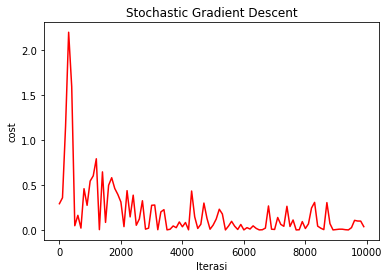

In [ ]:
plt.xlabel("Iterasi")
plt.ylabel("cost")
plt.title("Stochastic Gradient Descent")
plt.plot(s_iterasi_list,s_cost_list, color='red', label='Eror')
plt.show()

In [ ]:
import random
np.random.permutation(20)

array([ 7, 13,  2, 16, 14,  4, 15, 18,  9,  1,  8, 19,  0, 17,  3, 12, 10,
        6,  5, 11])

In [ ]:
def mini_batch_gradient_descent(X, y, iterasi, batch_size = 5, learning_rate = 0.1):

    jumlah_variabel = X.shape[1]                   # array numpy dengan 1 baris dan sejumlah kolom variabel
                                                   # Contoh: X_array([[1,2], [3,4], [5,5], [6,6], [7,2], [8,1]])
    
    bpoly = np.ones(shape=(jumlah_variabel))       # b1, b2, ... b(jumlah variabel)
    b0 = 0                                         # b0 atau bias
    n = X.shape[0]                                 # jumlah baris data X
    
    if batch_size > n: 
        batch_size = n                             # Jika batch size > n maka akan menjadi bacth gradient descent biasa
        
    cost_list = []                                 # list untuk menampung nilai cost setiap iterasi
    iterasi_list = []                              # list untuk menampung nilai n iterasi(1, 2, 3, ..., n)
    b_list=[]                                      # list untuk menampung nilai parameter regresi b0, b1, .. b(jumlah_variabel) 
                                                   # setiap iterasi
    
    jumlah_batch = int(n/batch_size)
    
    # Program akan berjalan hingga sejumlah iterasi=n dicapai
    for i in range(iterasi):  
        
        random_indices = np.random.permutation(n)      # Memilih indeks data random untuk update parameter
        X_smntr = X[random_indices]
        y_smntr = y[random_indices]
        
        for j in range(0, n, batch_size):
            Xj = X_smntr[j:j+batch_size]
            yj = y_smntr[j:j+batch_size]
            
            y_pred = np.dot(bpoly, Xj.T) + b0           # Menghitung y_pred pada setiap iterasi
        
            bpoly_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_pred))   # Menghitung perubahan/gradien bpoly setiap iterasi
            b0_grad = -(2/len(Xj))*np.sum(yj-y_pred)          # Menghitung perubahan/gradien b0 setiap iterasi
            bpoly = bpoly - learning_rate * bpoly_grad        # Memperbaharui bpoly setiap iterasi
            b0 = b0 - learning_rate * b0_grad                 # Memperbaharui bpoly setiap iterasi
        
            # Menyimpan parameter b dalam list tunggal
            bp=[]
            for jv in range(jumlah_variabel):
                bp1=bpoly[jv]
                bp.append(bp1)
            b=[b0]+bp
        
            cost = np.mean(np.square(yj-y_pred))       # MSE (Mean Squared Error)
        
        if i%100==0: # Hanya mengambil hasil pada iterasi kelipatan 10
            cost_list.append(cost)                     # Menyimpan nilai cost setiap iterasi
            iterasi_list.append(i)                     # Menyimpan nilai iterasi setiap iterasi
            b_list.append(b)                           # Menyimpan nilai parameter b setiap iterasi
        
    return bpoly, b0, cost, b_list, cost_list, iterasi_list  # Ouput

In [ ]:
mulai = time.time()
mb_bpoly, mb_b0, mb_cost, mb_b_list, mb_cost_list, mb_iterasi_list=mini_batch_gradient_descent(scaled_X, 
                                                                                               scaled_y_reshape,
                                                                                               iterasi=10000, 
                                                                                               batch_size = 5, 
                                                                                               learning_rate = 0.1)
selesai = time.time()
waktu_komputasi = (selesai - mulai)
print("Waktu Komputasi: ",waktu_komputasi)

Waktu Komputasi:  4.052391290664673


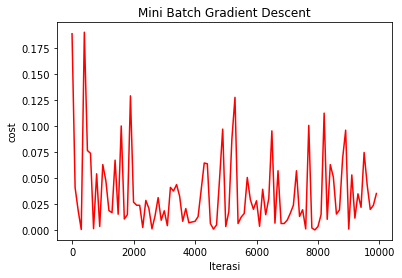

In [ ]:
plt.xlabel("Iterasi")
plt.ylabel("cost")
plt.title("Mini Batch Gradient Descent")
plt.plot(mb_iterasi_list,mb_cost_list, color='red', label='Eror')
plt.show()